# Student Performance Analysis - ML Assignment

**Objective:** Predict whether a student will pass or fail based on exam scores and other features using Logistic Regression and Random Forest.

In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [22]:
# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Cleaning

In [23]:
# Check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [24]:
# Create a new column 'average_score' and a binary 'pass' column
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

In [25]:
# Drop the average_score column because it is no longer needed i have created to create pass column
df = df.drop(['average_score'], axis=1)

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)
df.head()

,math score,reading score,writing score,pass,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,1,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,1,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,1,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,0,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,1,True,False,True,False,False,False,False,False,True,False,True,True


## Exploratory Data Analysis (EDA)

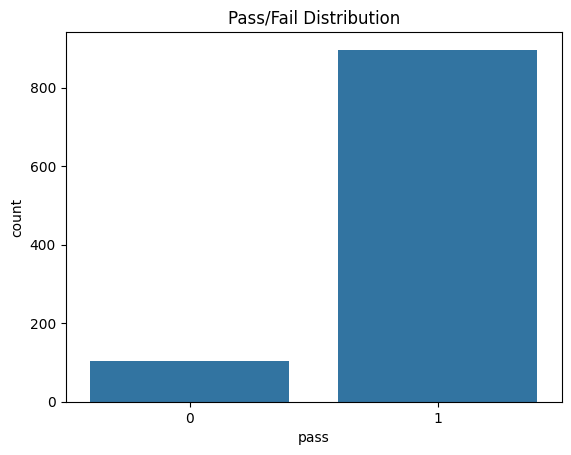

In [26]:
# Countplot of pass/fail
sns.countplot(x='pass', data=df)
plt.title("Pass/Fail Distribution")
plt.show()

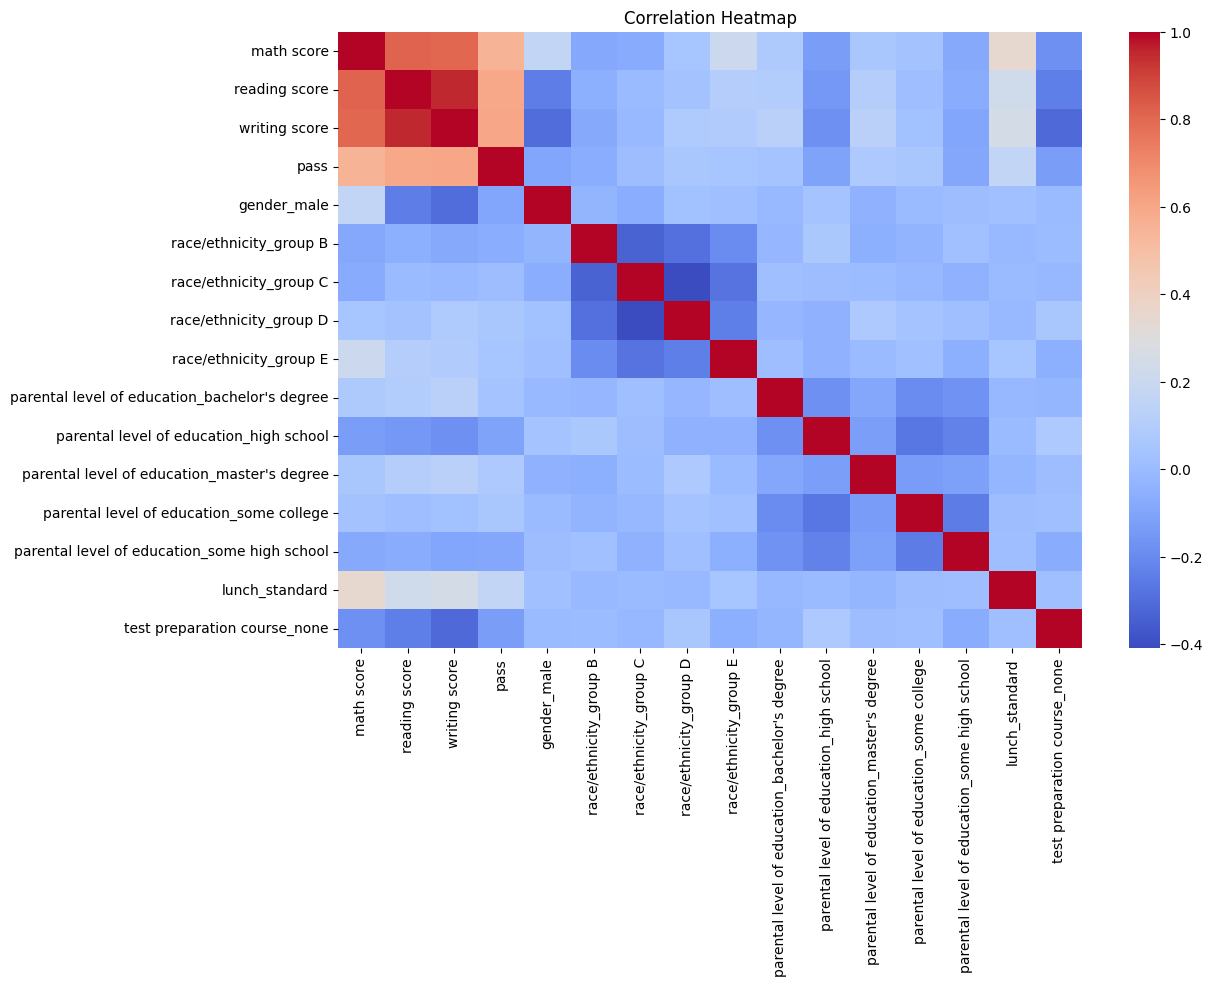

In [27]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

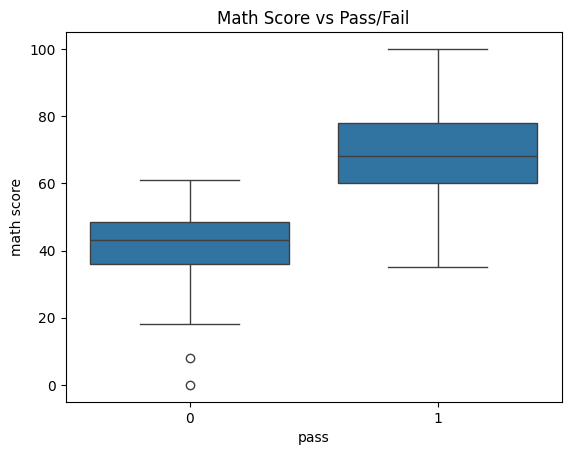

In [28]:
# Boxplot of math scores vs pass/fail
sns.boxplot(x='pass', y='math score', data=df)
plt.title("Math Score vs Pass/Fail")
plt.show()

## Model Building

In [29]:
# Splitting data into features and target
X = df.drop('pass', axis=1)
y = df['pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [30]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[ 27   0]
 [  0 173]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Random Forest

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.995
F1 Score: 0.9971181556195965
Confusion Matrix:
 [[ 26   1]
 [  0 173]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.99      1.00      1.00       173

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



## Conclusion

- Logistic Regression and Random Forest models were trained.
- Random Forest generally performs better due to its ensemble nature.
- The 'pass' label was created based on the average of three subject scores.
- No missing values or major issues were found during data cleaning.